# Assignment04
To compare the 2 methods of generating a uniform normal ditribution and to analyse the results generated by the 2

In [2]:
# importng dependencies
import numpy as np
import matplotlib.pyplot as plt
import math
import time

def uniform_generator(x_0):
    a = 1597
    b = 21544
    m = 244944
    x_0 = (a*x_0 + b)%m
    return x_0/m, x_0

In [3]:
# Function to generate the mean
def mean(arr):
    n = len(arr)
    sum = 0
    for _ in range(len(arr)):
        sum += arr[_]
    return sum / n

In [4]:
# Function to generate the variance
def var(arr):
    m = mean(arr)
    arr2 = []
    for _ in range(len(arr)):
        arr2.append(arr[_]**2)
    m2 = mean(arr2)
    return m2 - m**2

## Problem 01: 

Elapsed time:  7.510185241699219e-05
for z1: 
mean obtained: for 100 -0.15717948917295715
var obtained: for 100 1.0700810230709608
for z2: 
mean obtained: for 100 0.014827152850598444
var obtained: for 100 1.0885188041331986
 


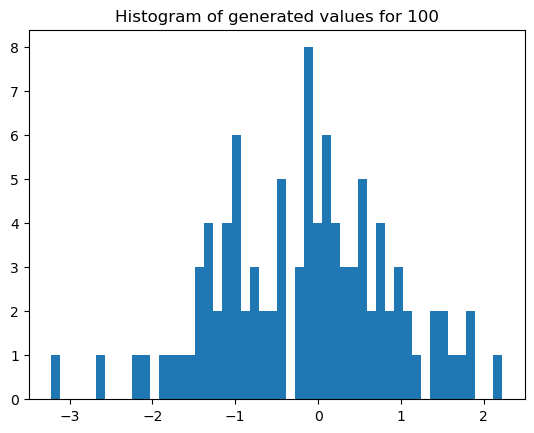

Elapsed time:  0.00596928596496582
for z1: 
mean obtained: for 10000 -0.0068598759896896224
var obtained: for 10000 0.9938921382050625
for z2: 
mean obtained: for 10000 -0.0009879259645278538
var obtained: for 10000 1.0102277195571687
 


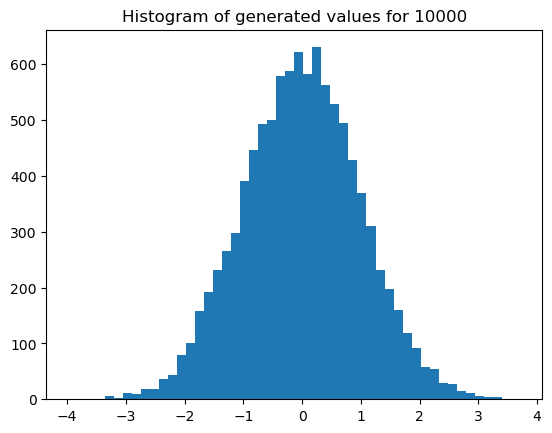

In [6]:
#generating using box - muller method

N = [100, 10000]
for n in N:
    z1 = []
    z2 = []
    x_0 = 42
    x_1 = 519
    start_time = time.time()
    for _ in range(n):
        u1, x_0 = uniform_generator(x_0)
        u2, x_1 = uniform_generator(x_1)

        r = math.sqrt(-2*math.log(u1))
        theta = 2*math.pi*u2

        z1.append(r*math.cos(theta))
        z2.append(r*math.sin(theta))
        
    end_time = time.time()
    print("Elapsed time: ", end_time - start_time)
    print("for z1: ")
    print(f"mean obtained: for {n}", mean(z1))
    print(f"var obtained: for {n}", var(z1))
    print("for z2: ")
    print(f"mean obtained: for {n}", mean(z2))
    print(f"var obtained: for {n}", var(z2))
    print(" ")
    
    plt.title(f"Histogram of generated values for {n}")
    plt.hist(z1,bins = 50)
    plt.show()

Elapsed time:  0.00016808509826660156
for z1: 
mean obtained: for 100 -0.21443084844511728
var obtained: for 100 1.0458494070372768
for z2: 
mean obtained: for 100 -0.07491264799626476
var obtained: for 100 1.3194374137718485
fraction of rejected samples:  0.2805755395683453
1 - pi/4:  0.21460183660255172
 


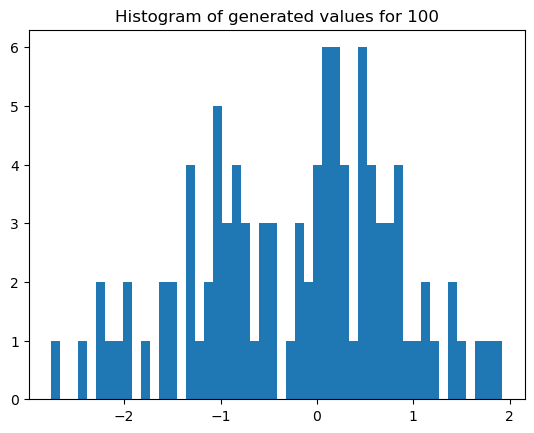

Elapsed time:  0.014357805252075195
for z1: 
mean obtained: for 10000 -0.019493607078614056
var obtained: for 10000 0.9938942563160081
for z2: 
mean obtained: for 10000 -0.022595405643741198
var obtained: for 10000 0.9989458587726247
fraction of rejected samples:  0.21771102245169366
1 - pi/4:  0.21460183660255172
 


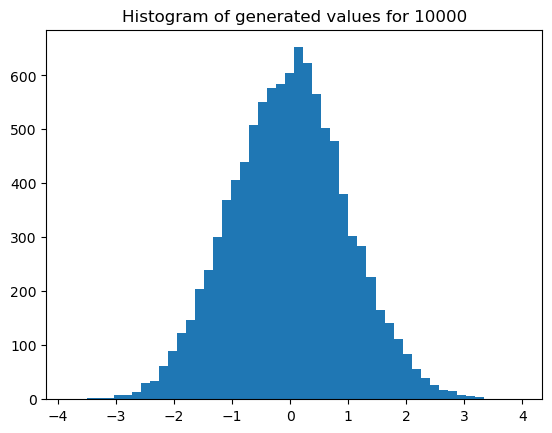

In [7]:
# generating using the Marsaglia - Bray method
N = [100, 10000]
for n in N:
    x_0 = 42
    x_1 = 519
    z1 = []
    z2 = []
    count_a = 0
    count_t = 0
    start_time = time.time()
    for _ in range(n):
        u1, x_0 = uniform_generator(x_0)
        u2, x_1 = uniform_generator(x_1)
        u1 = 2*u1 - 1
        u2 = 2*u2 - 1
        count_t += 1
        while(u1**2 + u2**2 > 1):
            u1, x_0 = uniform_generator(x_0)
            u2, x_1 = uniform_generator(x_1)
            u1 = 2*u1 - 1
            u2 = 2*u2 - 1
            count_t += 1
        z1.append(u1*math.sqrt((-2*math.log(u1**2 + u2**2))/(u1**2 + u2**2)))
        z2.append(u2*math.sqrt((-2*math.log(u1**2 + u2**2))/(u1**2 + u2**2)))
        count_a += 1
    end_time = time.time()
    print("Elapsed time: ", end_time - start_time)
    print("for z1: ")
    print(f"mean obtained: for {n}", mean(z1))
    print(f"var obtained: for {n}", var(z1))
    print("for z2: ")
    print(f"mean obtained: for {n}", mean(z2))
    print(f"var obtained: for {n}", var(z2))
    print("fraction of rejected samples: ", (count_t - count_a)/count_t)
    print("1 - pi/4: ", 1 - math.pi/4)
    print(" ")
    plt.title(f"Histogram of generated values for {n}")
    plt.hist(z1,bins = 50)
    plt.show()

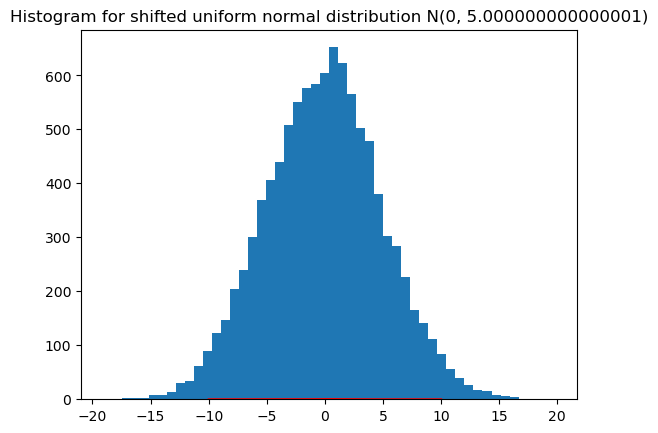

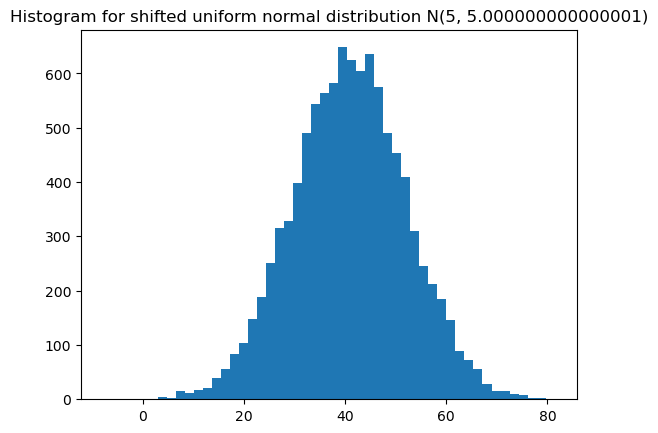

In [22]:
#using above generated z1 values to figure out a shifted uniform normal distribution
mu = [0, 5]
sigma = math.sqrt(5)
for _ in range(len(z1)):
    z1[_] = mu[0] + sigma*z1[_]
y = [(1/(math.sqrt(2*math.pi)))*(math.exp(-1*(((2*i/100) - 10)**2)/2)) for i in range(1000)]
x = np.linspace(-10, 10, 1000)
plt.title(f"Histogram for shifted uniform normal distribution N({mu[0]}, {sigma**2})")
plt.hist(z1, bins = 50)
plt.plot(x, y, color='red')
plt.show()
for _ in range(len(z2)):
    z2[_] = mu[1] + sigma*z2[_]
plt.title(f"Histogram for shifted uniform normal distribution N({mu[1]}, {sigma**2})")
plt.hist(z2, bins = 50)
plt.show()


## Problem 02

In [10]:
# Step -1
# Generating uniform values in the interval [-L, L]
L = 10 # assume
x_0 = 42
#Step - 2
# Calculating the integrand value for the generated random values
N = 10000
z = []
for _ in range(N):
    x, x_0 = uniform_generator(x_0)
    x -= 0.5
    x *= 2*L
    #above steps to generate random values in the range [-L, L]
    z.append(math.exp(-x**2) / (1 + abs(x)))
    #storing values of the function in an array
avg = mean(z)
integral_val = 2 * L * avg
print(f"Approximated Integral: {integral_val}")   
print("Actual value of integral is approx 1.2103")

Approximated Integral: 1.2044608659078864
Actual value of integral is approx 1.2103


# end